<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Семинар 13. Python для анализа данных. Средства визуализации. Pandas, Matplotlib, Seaborn
## <center>Практическое задание. Визуальный анализ данных пассажиров "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("titanic_train.csv")

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Downton, Mr. William James",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями**

In [5]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

## Первичный анализ данных

**1. Сколько мужчин / жещин находилось на борту?**

In [6]:
print("На борту было {} мужчин и {} женщин.".format(
        sum(train_df['Sex'] == 'male'), 
        sum(train_df['Sex'] == 'female')))

На борту было 577 мужчин и 314 женщин.


**Проще:**

In [7]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно – это же распределение только для мужчин / женщин по отдельности.**

In [8]:
pd.crosstab(train_df['Pclass'], train_df['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [9]:
print("Mean fare: ", round(train_df['Fare'].mean(), 2))
print("Median fare: ", round(train_df['Fare'].median(), 2))
print("Fare std: ", round(train_df['Fare'].std(), 2))

Mean fare:  32.2
Median fare:  14.45
Fare std:  49.69


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" – те, кто моложе 30, а "старики" – те, кто старше 60.**

In [10]:
young_survived = train_df[train_df['Age'] < 30]['Survived']
old_survived = train_df[train_df['Age'] > 60]['Survived']

print("Доли выживыших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(
    round(100 * young_survived.mean(), 2), round(100 * old_survived.mean(), 2)))

Доли выживыших: 
	 среди молодых 37.08%, 
	 среди старых 22.73%.


**5. Правда ли, что женщины выживали чаще мужчин?**

In [11]:
male_survived = train_df[train_df['Sex'] == 'male']['Survived']
female_survived = train_df[train_df['Sex'] == 'female']['Survived']


print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
    round(100 * female_survived.mean(), 2), round(100 * male_survived.mean(), 2)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.89%


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [12]:
names = train_df[train_df['Sex'] == 'male']['Name'].apply(lambda full_name: 
                                                  full_name.split()[2])
names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

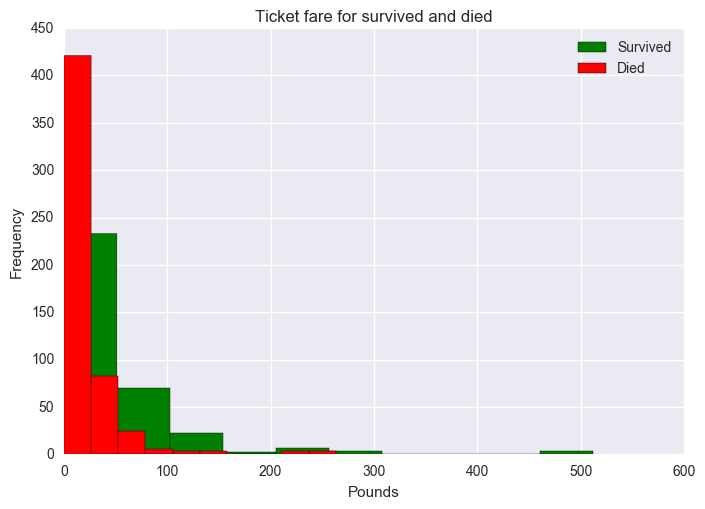

In [13]:
train_df[train_df['Survived'] == 1]['Fare'].hist(color="green", label='Survived')
train_df[train_df['Survived'] == 0]['Fare'].hist(color="red", label='Died')
title('Ticket fare for survived and died')
xlabel('Pounds')
ylabel('Frequency')
legend();

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [14]:
for cl in train_df['Pclass'].unique():
    for sex in train_df['Sex'].unique():
        print("Average age for {0} and class {1}: {2}".format(sex, cl, 
            round(train_df[(train_df['Sex'] == sex)
                         & (train_df['Pclass'] == cl)]['Age'].mean(),2)))

Average age for male and class 3: 26.91
Average age for female and class 3: 23.57
Average age for male and class 1: 39.0
Average age for female and class 1: 33.98
Average age for male and class 2: 30.51
Average age for female and class 2: 28.7


**Сделайте этого немного изящней с groupby.**

In [15]:
for (cl, sex), sub_df in train_df.groupby(['Pclass', 'Sex']):
    print("Average age for {0} and class {1}: {2}".format(sex, cl,
                                                         round(sub_df['Age'].mean(), 2)))

Average age for female and class 1: 33.98
Average age for male and class 1: 39.0
Average age for female and class 2: 28.7
Average age for male and class 2: 30.51
Average age for female and class 3: 23.57
Average age for male and class 3: 26.91


## Первичный визуальный анализ данных

**9. Постройте попарные зависимости признаков `Age`, `Fare`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

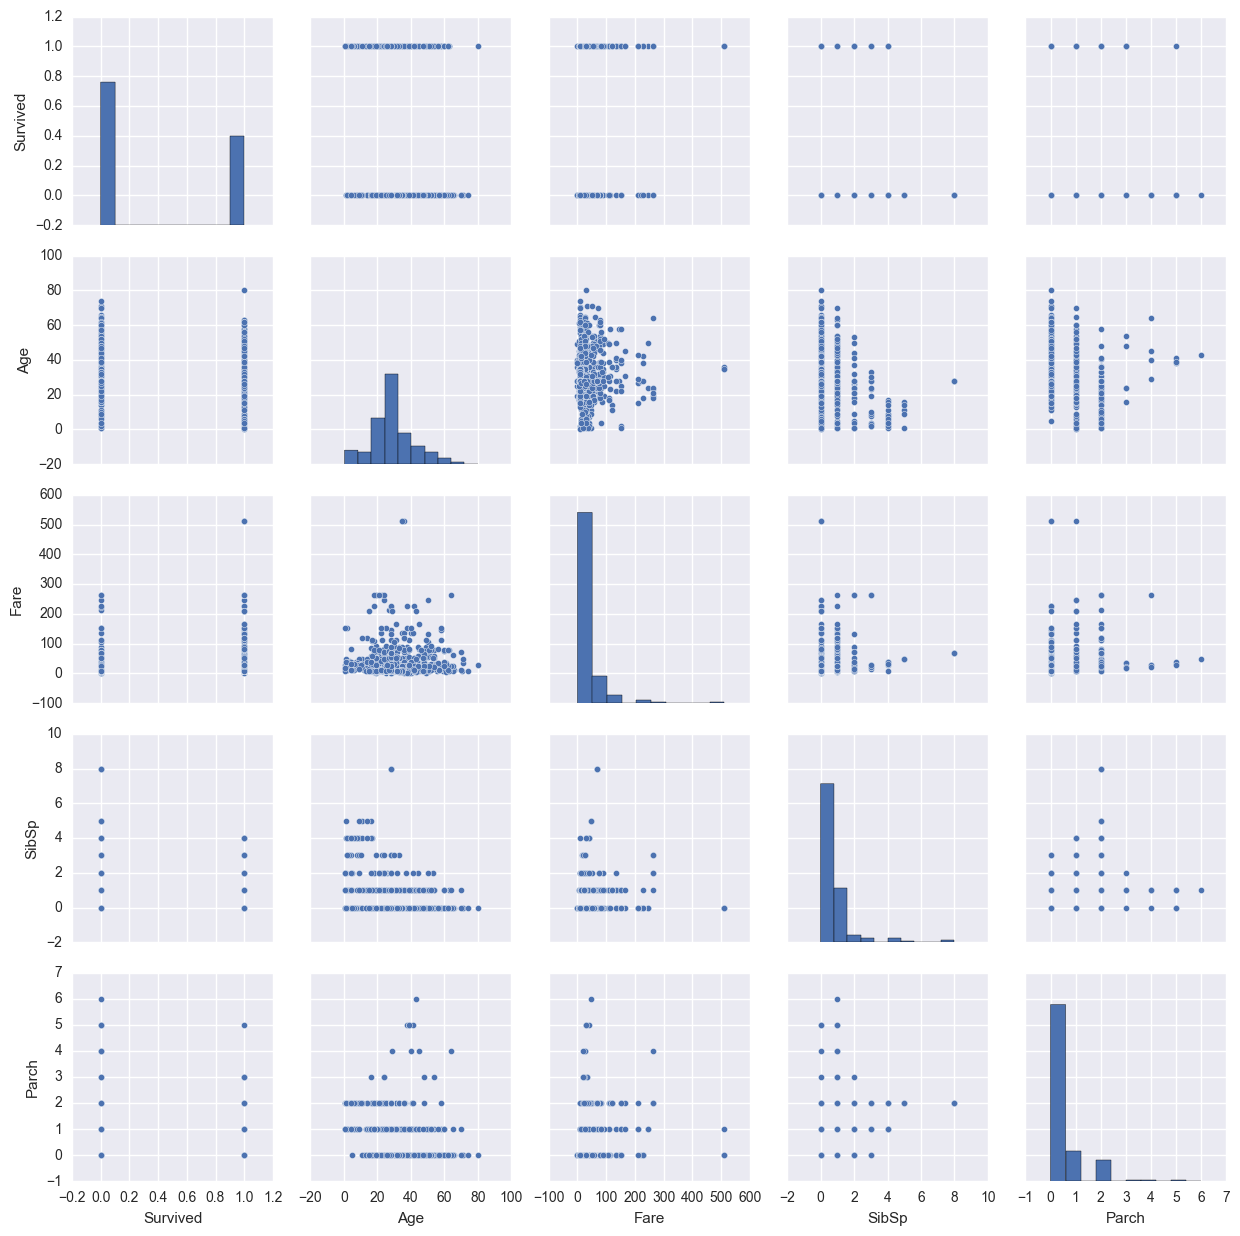

In [16]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare',  'SibSp', 
                       'Parch', 'Embarked']]);

**10. Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

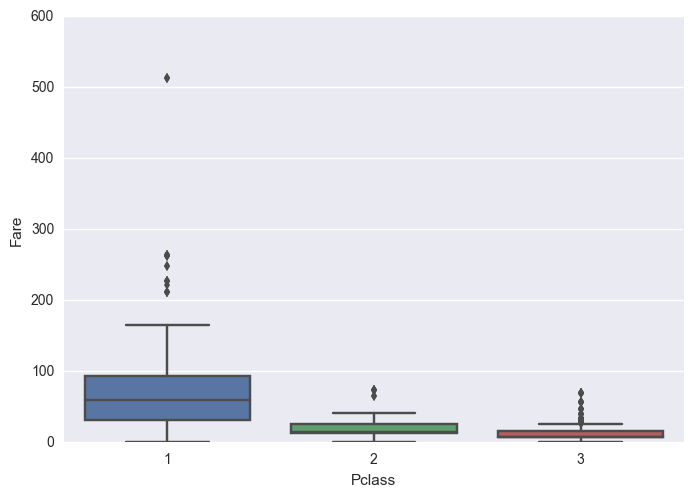

In [17]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 3 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [18]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - fare_pclass1.mean()).abs()  < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - fare_pclass2.mean()).abs()  < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - fare_pclass3.mean()).abs()  < 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)

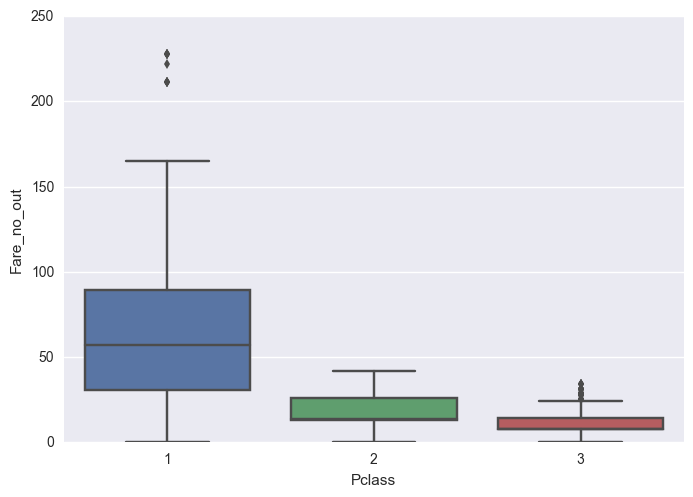

In [19]:
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**11. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

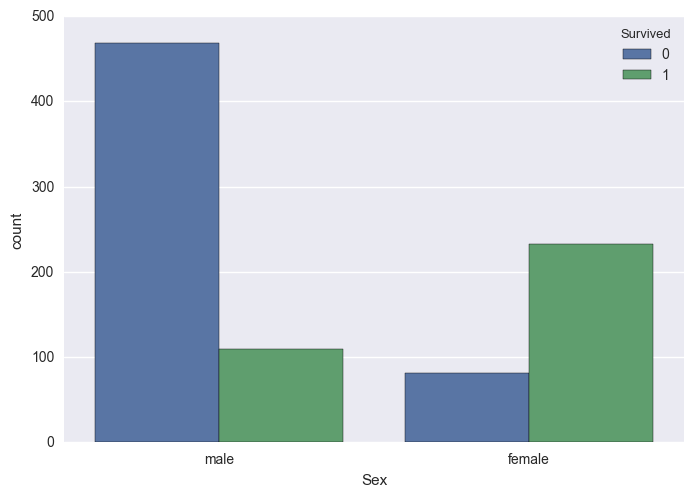

In [20]:
sns.countplot(x="Sex", hue="Survived", data=train_df);

**12. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

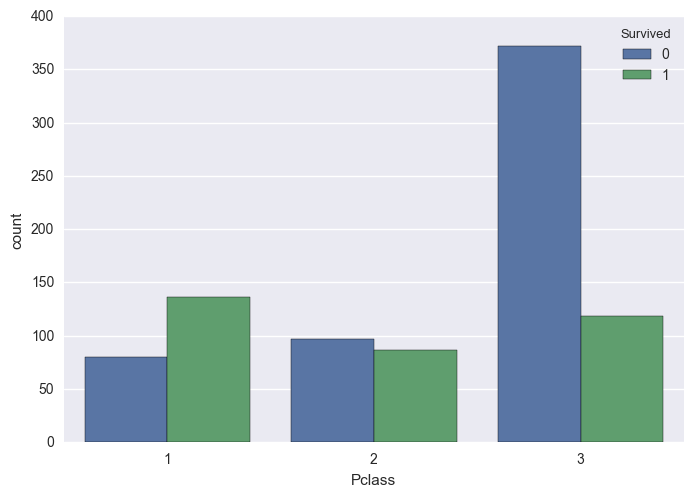

In [21]:
sns.countplot(x="Pclass", hue="Survived", data=train_df);

**13. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

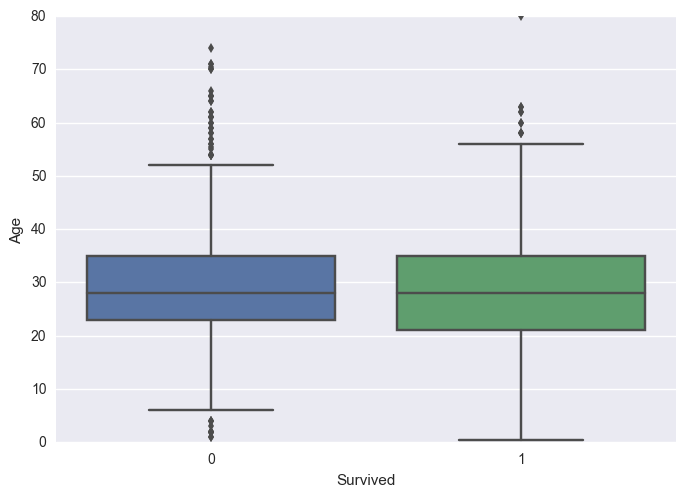

In [22]:
sns.boxplot(x='Survived', y='Age', data=train_df);